In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, LSTM, GRU
from tensorflow.keras.utils import pad_sequences
from keras.preprocessing.text import one_hot
import tensorflow as tf

In [ ]:
import re
import string
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

sw_indo = stopwords.words('indonesian') + list(punctuation)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# IMPORT DATASET

In [ ]:
df1 = pd.read_csv("/content/dataset_combined (1).csv", encoding='latin-1')
df1['class'].replace({"HS":1, "Not_HS": 0, 'NotHS':0}, inplace=True)
df1.head()

,class,comment_text
0,1,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,1,Geblek lo tata...cowo bgt dibela2in balikan......
2,1,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,1,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,1,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [ ]:
df2 = pd.read_csv("/content/572-hate-speech-dataset.csv", encoding='latin-1')
df2['class'].replace({"HS":1, "Not_HS": 0, 'NotHS':0}, inplace=True)
df2.head()

,comment_text,class
0,@david.wood17 knp lo gak berani bersumpah dan ...,1
1,"haha, somad somad. Muka dekil otak 0% , kok ya...",1
2,"hahaha, kaum sableng 212 kl berita begini mrk ...",1
3,"hahaha, makin stress aja ni umat sableng, dlu...",1
4,HIDUP PSI = partai SAMPAH indonesia..... ...,1


# Menggabungkan 2 Data Frame

In [ ]:
df = pd.concat([df1, df2])
df

,class,comment_text
0,1,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,1,Geblek lo tata...cowo bgt dibela2in balikan......
2,1,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,1,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,1,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...
567,0,@dedijunaidi212 'afwan ya akhi...
568,0,Aamiin.. Yaa Rahman.. Yaa Rahiim..
569,0,Siaaap.... GERAK..!!!
570,0,Bkan polisi yg bilang gila tapi saksi ahli.


In [ ]:
df['class'].value_counts()

class
1    772
0    772
Name: count, dtype: int64

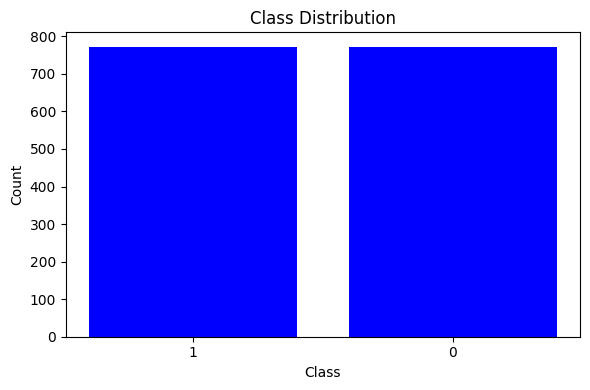

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {
    'Class': ['1', '0'],
    'Count': [772, 772],
}

df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))

index = range(len(df['Class']))

plt.bar(index, df['Count'], color='b', align='center')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(index, df['Class'])

plt.tight_layout()
plt.show()


# TOKENISASI

In [ ]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):

  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]

    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)

    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)

    #Remove punctuations / tanda baca
    tweet = tweet.translate(str.maketrans("","",string.punctuation))

    #tokenizing words using NLTK
    tokens = word_tokenize(tweet)

    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in sw_indo]

    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()

    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [ ]:
df['comment_text'] = df['comment_text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')


Text Preprocessing complete.


In [ ]:
X = np.array(df["comment_text"].values)
y = np.array(df["class"].values)

In [ ]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
tweets = pad_sequences(sequences, maxlen=max_len)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, y, test_size=0.2, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1235, 200), (309, 200), (1235,), (309,))

# ARSITEKTUR MODEL

In [ ]:
model = Sequential()

embeded_vector_size = 35

model.add(Embedding(max_words, embeded_vector_size,input_length=max_len))
model.add(LSTM(64,dropout=0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 35)           175000    
                                                                 
 lstm (LSTM)                 (None, 64)                25600     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 201785 (788.22 KB)
Trainable params: 201785 (788.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# TRAINING

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=["accuracy"],
)

epochs=10
history = model.fit(
  X_train, y_train, validation_data=(X_test, y_test), epochs=epochs
)

Epoch 1/10
39/39 [==============================] - 9s 144ms/step - loss: 0.6927 - accuracy: 0.5117 - val_loss: 0.6886 - val_accuracy: 0.6181
Epoch 2/10
39/39 [==============================] - 6s 152ms/step - loss: 0.6547 - accuracy: 0.6704 - val_loss: 0.5775 - val_accuracy: 0.7184
Epoch 3/10
39/39 [==============================] - 5s 122ms/step - loss: 0.4544 - accuracy: 0.8891 - val_loss: 0.4063 - val_accuracy: 0.8706
Epoch 4/10
39/39 [==============================] - 6s 149ms/step - loss: 0.1658 - accuracy: 0.9660 - val_loss: 0.2676 - val_accuracy: 0.8964
Epoch 5/10
39/39 [==============================] - 6s 159ms/step - loss: 0.0486 - accuracy: 0.9862 - val_loss: 0.2869 - val_accuracy: 0.8900
Epoch 6/10
39/39 [==============================] - 5s 136ms/step - loss: 0.1158 - accuracy: 0.9619 - val_loss: 0.2807 - val_accuracy: 0.8835
Epoch 7/10
39/39 [==============================] - 5s 139ms/step - loss: 0.0396 - accuracy: 0.9895 - val_loss: 0.2490 - val_accuracy: 0.9094
Epoch 

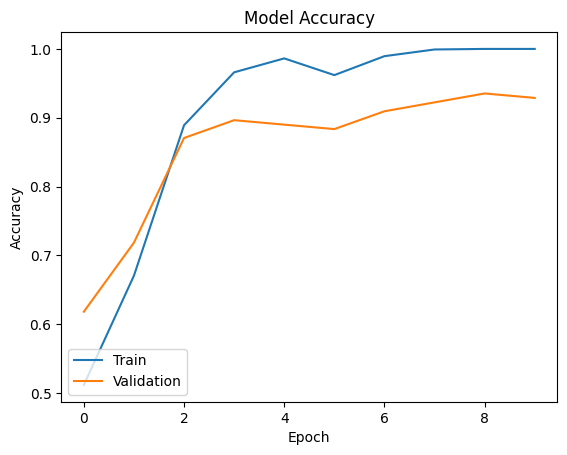

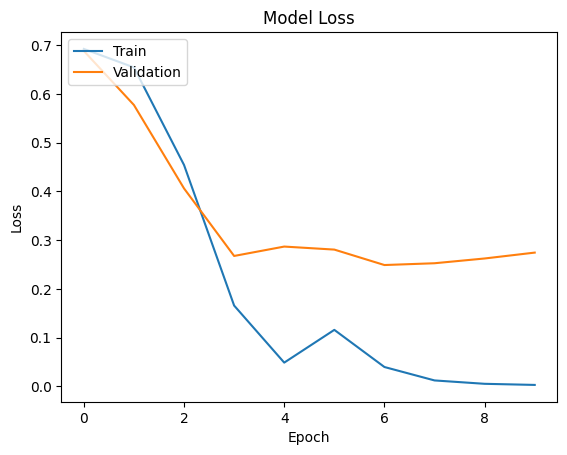

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# SAVE HASIL TRAINING

In [ ]:
model.save('my_model.keras')

# TESTING

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 1s 47ms/step - loss: 0.2745 - accuracy: 0.9288
Test Loss: 0.2744843363761902
Test Accuracy: 0.9288026094436646


# PREDIKSI

In [ ]:
model = tf.keras.models.load_model('my_model.keras')

In [ ]:
texts = ['baju doni sangat bau', 'gambar itu jelek', 'dia sangat tampan']

In [ ]:
for text in texts:
    sequence = tokenizer.texts_to_sequences([text]) #konversi teks menjadi urutan indeks token
    test = pad_sequences(sequence, maxlen=max_len) #perlu panjang yang konsisten
    pred = model.predict(test)
    if pred > 0.5:
        print(f'Text: "{text}" is Hate Speech')
    else:
        print(f'Text: "{text}" is Not Hate Speech')

1/1 [==============================] - 1s 702ms/step
Text: "baju doni sangat bau" is Hate Speech
1/1 [==============================] - 0s 39ms/step
Text: "gambar itu jelek" is Hate Speech
1/1 [==============================] - 0s 42ms/step
Text: "dia sangat tampan" is Hate Speech


## **EVALUASI MODEL LTSM**

In [ ]:
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype('int32')

10/10 [==============================] - 1s 51ms/step


In [ ]:
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9288025889967637
Precision: 0.9473684210526315
Recall: 0.9113924050632911
F1 Score: 0.9290322580645162


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, binary_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       151
           1       0.95      0.91      0.93       158

    accuracy                           0.93       309
   macro avg       0.93      0.93      0.93       309
weighted avg       0.93      0.93      0.93       309



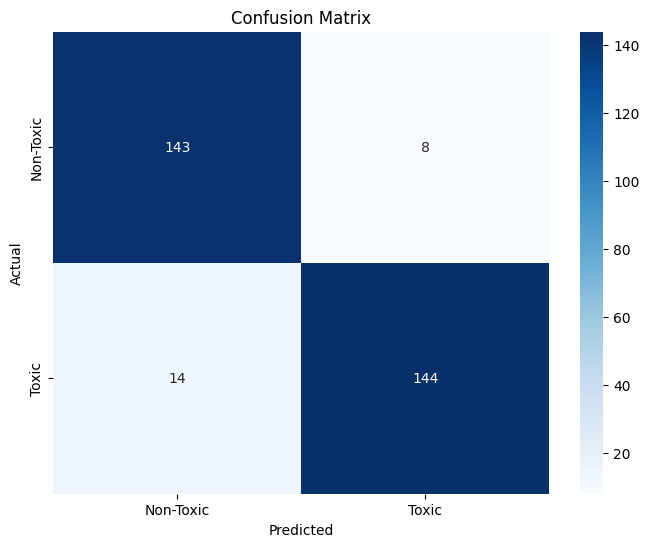

In [ ]:
cm = confusion_matrix(y_test, binary_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **GRU MODEL**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [ ]:
model = Sequential()

embeded_vector_size = 35

model.add(Embedding(max_words, embeded_vector_size,input_length=max_len))
model.add(GRU(64, dropout=0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=["accuracy"],
)

epochs=10
history = model.fit(
  X_train, y_train, validation_data=(X_test, y_test), epochs=epochs
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 35)           175000    
                                                                 
 gru (GRU)                   (None, 64)                19392     
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 195577 (763.97 KB)
Trainable params: 195577 (763.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
39/

In [ ]:
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype('int32')

10/10 [==============================] - 1s 23ms/step


In [ ]:
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
accuracy = accuracy_score(y_test, binary_predictions)

print("Presisi:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Akurasi:", accuracy)

Presisi: 0.9235668789808917
Recall: 0.9177215189873418
F1 Score: 0.9206349206349206
Akurasi: 0.919093851132686


# **SVM MODEL**

In [ ]:
X_train_list = X_train.tolist()
X_test_list = X_test.tolist()

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_str = [" ".join(map(str, x)) for x in X_train]
X_test_str = [" ".join(map(str, x)) for x in X_test]

# Mengubah teks ke dalam fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=max_words)
X_train_tfidf = vectorizer.fit_transform(X_train_str)
X_test_tfidf = vectorizer.transform(X_test_str)

# Membuat model SVM
model_svm = SVC(kernel='linear', random_state=42)

In [ ]:
model_svm.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
predictions_svm = model_svm.predict(X_test_tfidf)

In [ ]:
precision_svm = precision_score(y_test, predictions_svm)
recall_svm = recall_score(y_test, predictions_svm)
f1_svm = f1_score(y_test, predictions_svm)
accuracy_svm = accuracy_score(y_test, predictions_svm)

print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("Accuracy:", accuracy_svm)

Precision: 0.9602649006622517
Recall: 0.9177215189873418
F1 Score: 0.9385113268608414
Accuracy: 0.9385113268608414


# **CNN-RNN HYBIRD MODEL**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GRU, Dense, Dropout, Flatten, Reshape


model = Sequential()

model.add(Embedding(max_words, embeded_vector_size, input_length=max_len))

# Lapisan Convolutional Neural Network (CNN)
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))

model.add(Flatten())

# Lapisan Reshape untuk menambahkan dimensi timestep
model.add(Reshape((24, 16)))

# Lapisan GRU
model.add(GRU(64, dropout=0.5))

# Lapisan Dense
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 10
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 35)           175000    
                                                                 
 conv1d_3 (Conv1D)           (None, 196, 128)          22528     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 39, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 35, 128)           82048     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 7, 128)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 3, 128)           

In [ ]:
predictions = model.predict(X_test)
# Mengubah nilai probabilitas menjadi kelas biner (0 atau 1) dengan threshold 0.5
binary_predictions = (predictions > 0.5).astype('int32')

10/10 [==============================] - 0s 37ms/step


In [ ]:
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.912621359223301
Precision: 0.9281045751633987
Recall: 0.8987341772151899
F1 Score: 0.9131832797427653


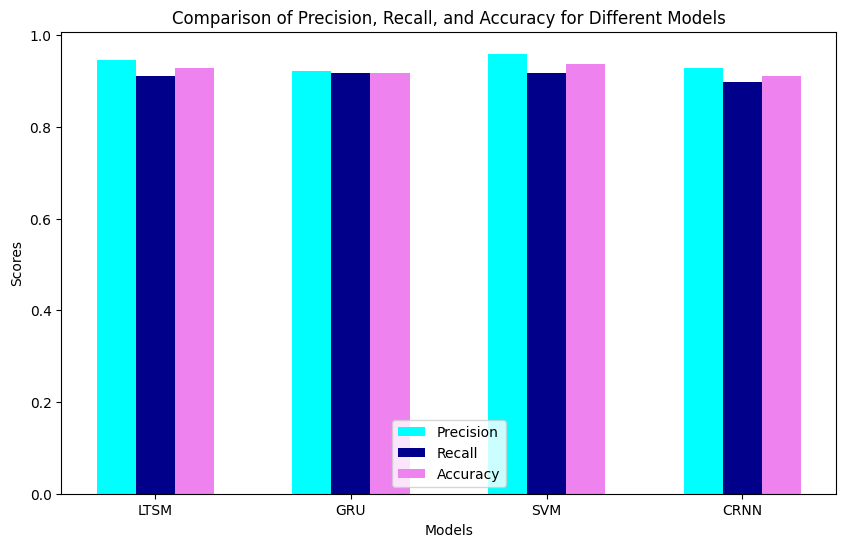

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['LTSM', 'GRU', 'SVM', 'CRNN']
precision = [0.947, 0.923, 0.960, 0.928]
recall = [0.911, 0.917, 0.917, 0.898]
accuracy = [0.928, 0.919, 0.938, 0.912]

x = range(len(models))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, precision, width=0.2, label='Precision', color='cyan', align='center')
plt.bar([i + 0.2 for i in x], recall, width=0.2, label='Recall', color='darkblue', align='center')
plt.bar([i + 0.4 for i in x], accuracy, width=0.2, label='Accuracy', color='violet', align='center')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Precision, Recall, and Accuracy for Different Models')
plt.xticks([i + 0.2 for i in x], models)
plt.legend()

plt.show()

In [ ]:
import pandas as pd

# Data
data = {
    'Model': ['LTSM', 'GRU', 'SVM', 'CRNN'],
    'Precision': [0.947, 0.923, 0.960, 0.928],
    'Recall': [0.911, 0.917, 0.917, 0.898],
    'Accuracy': [0.928, 0.919, 0.938, 0.912]
}

df = pd.DataFrame(data)

# Sorting by Accuracy
sorted_df = df.sort_values(by='Accuracy', ascending=False)

print(sorted_df)


  Model  Precision  Recall  Accuracy
2   SVM      0.960   0.917     0.938
0  LTSM      0.947   0.911     0.928
1   GRU      0.923   0.917     0.919
3  CRNN      0.928   0.898     0.912
